In [17]:
from pathlib import Path
import pandas as pd

urbansim_source_dir = "../../production/dallas/urbansim_v2/100k"
out_dir = "../../production/dallas/urbansim_v2/10k"


In [18]:
persons = pd.read_csv(f"{urbansim_source_dir}/persons.csv.gz")
households = pd.read_csv(f"{urbansim_source_dir}/households.csv.gz")
plans = pd.read_csv(f"{urbansim_source_dir}/plans.csv.gz")
blocks = pd.read_csv(f"{urbansim_source_dir}/blocks.csv.gz")
print(f"Number of persons: {persons.shape[0]}")
print(f"Number of households: {households.shape[0]}")


Number of persons: 100004
Number of households: 47806


In [19]:
pop_size = 10_000

random_hh = households.sample(n=round(pop_size * 0.7))
persons1 = persons[persons['household_id'].isin(random_hh['household_id'])]
pop_size_person_set = persons1.sort_values('household_id')[0:pop_size]
selected_household_ids = pop_size_person_set['household_id'].unique()
print(f"total number of randomly selected HH: {len(selected_household_ids)}")


total number of randomly selected HH: 4830


In [20]:
selected_persons = persons[persons['household_id'].isin(selected_household_ids)]
selected_persons_ids = set(selected_persons['person_id'])
print(f"there are {len(selected_persons)} selected persons")

selected_households = households[households['household_id'].isin(selected_household_ids)]

selected_block_ids = set(selected_households['block_id'])
print(f"Number of selected blocks is {len(selected_block_ids)}")

selected_plans = plans[plans['person_id'].isin(selected_persons_ids)]
print(f"Number of selected plans is {len(selected_plans)}")

selected_blocks = blocks[blocks['block_id'].isin(selected_block_ids)]

there are 10001 selected persons
Number of selected blocks is 1262
Number of selected plans is 50005


<AxesSubplot: >

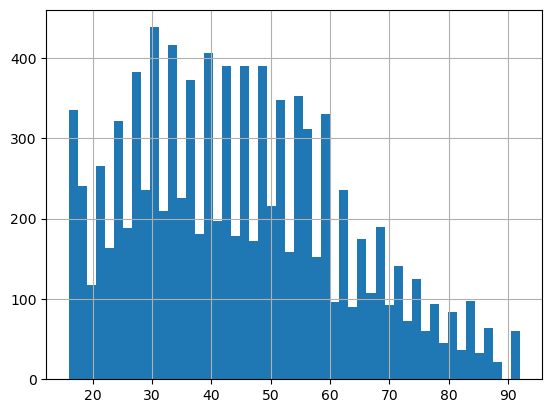

In [21]:
selected_persons['age'].hist(bins=50)

In [22]:
Path(out_dir).mkdir(parents=True, exist_ok=True)
selected_persons.to_csv(f'{out_dir}/persons.csv.gz', index=False, compression='gzip')
selected_households.to_csv(f'{out_dir}/households.csv.gz', index=False, compression='gzip')
selected_plans.to_csv(f'{out_dir}/plans.csv.gz', index=False, compression='gzip')
selected_blocks.to_csv(f'{out_dir}/blocks.csv.gz', index=False, compression='gzip')